# Depth Map from Stereo Images

$$disparity =  x - x' = \frac{Bf}{Z} $$ 

$x$ and $x′$ are the distance between points in image plane corresponding to the scene point 3D and their camera center. $B$ is the distance between two cameras (which we know from extrinsic calibration) and $f$ is the focal length of camera (already known). So in short, the above equation says that the depth of a point in a scene is inversely proportional to the difference in distance of corresponding image points and their camera centers. So with this information, we can derive the depth of all pixels in an image.

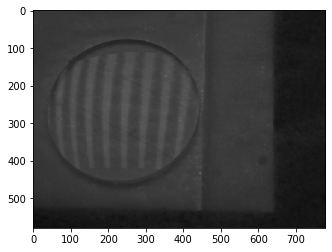

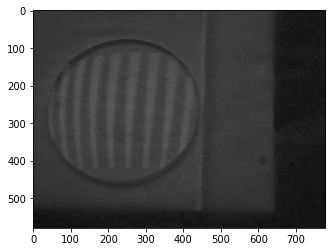

In [58]:
import numpy as np
import seaborn as sns
import cv2 as cv
from matplotlib import pyplot as plt

imgL = cv.imread('img0002.png')
imgR = cv.imread('img0003.png')


# Denoizing 
# im=cv.fastNlMeansDenoisingColored(imgL, None,10,10,7,21) 

plt.figure()
plt.imshow(imgL)

plt.figure()
plt.imshow(imgR)



In [46]:
print( imgL.shape, imgR.shape)

(580, 780, 3) (580, 780, 3)


In [68]:
imgL=cv.cvtColor(imgL, cv.COLOR_BGR2GRAY)
imgR=cv.cvtColor(imgR, cv.COLOR_BGR2GRAY)

stereo = cv.StereoBM_create()
disparity = stereo.compute(imgL,imgR)

plt.figure()
plt.imshow(disparity,'gray')
plt.show()



error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


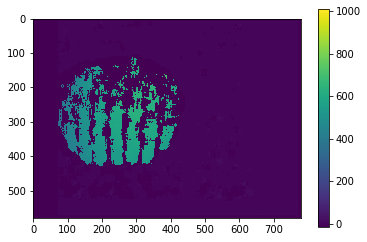

/Users/mariannelado-roy/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


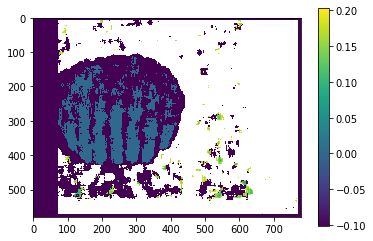

In [96]:
import numpy as np
plt.figure()
plt.imshow(disparity)
plt.colorbar()
plt.show()

T1 = np.array([56.368, -156.815, 142.289])
T2 = np.array([13.535, -156.640, 124.790])
B=np.linalg.norm(T1-T2)*1e-3
f=35e-3

plt.figure()
plt.imshow(B*f/(disparity)*1e3)
plt.colorbar()
plt.show()

0.0462699850334966
